<a href="https://colab.research.google.com/github/mulcahrj/6999_Capstone/blob/main/DATA6999_XGBoost.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv("/content/drive/MyDrive/DATA6999/selected_features.csv",na_values='-')

In [ ]:
df.head(5)

,InscClaimAmtReimbursed,Hospitalization_Duration,NoOfMonths_PartBCov,NoOfMonths_PartACov,Claim_Period,IPAnnualReimbursementAmt,OPAnnualReimbursementAmt,Patient_Age,Patient_Risk_Score,ChronicCond_Alzheimer,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,Gender_1,Gender_2,Race_1,PotentialFraud,Provider
0,0.994980,1.000000,1.0,1.0,0.991831,0.998780,0.056535,0.395268,0.602524,1,0,1,1,0,1,1,PRV55912
1,0.204499,0.000000,1.0,1.0,0.000000,0.997524,0.204382,0.548797,0.351837,1,0,0,1,0,1,1,PRV55912
2,0.992624,1.000000,1.0,1.0,0.998328,0.996393,0.073183,0.889586,0.436861,1,0,0,0,1,1,1,PRV55912
3,0.991593,1.000000,1.0,1.0,0.999427,0.995721,0.373397,0.707005,0.177925,0,1,0,1,0,1,1,PRV55912
4,0.988580,0.999998,1.0,1.0,0.981119,0.997969,0.204382,0.564990,0.520349,0,1,1,0,1,1,1,PRV55912


In [ ]:
provider = df['Provider']

In [ ]:
df = df.drop('Provider', axis=1)

In [ ]:
df.head(5)

,InscClaimAmtReimbursed,Hospitalization_Duration,NoOfMonths_PartBCov,NoOfMonths_PartACov,Claim_Period,IPAnnualReimbursementAmt,OPAnnualReimbursementAmt,Patient_Age,Patient_Risk_Score,ChronicCond_Alzheimer,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,Gender_1,Gender_2,Race_1,PotentialFraud
0,0.994980,1.000000,1.0,1.0,0.991831,0.998780,0.056535,0.395268,0.602524,1,0,1,1,0,1,1
1,0.204499,0.000000,1.0,1.0,0.000000,0.997524,0.204382,0.548797,0.351837,1,0,0,1,0,1,1
2,0.992624,1.000000,1.0,1.0,0.998328,0.996393,0.073183,0.889586,0.436861,1,0,0,0,1,1,1
3,0.991593,1.000000,1.0,1.0,0.999427,0.995721,0.373397,0.707005,0.177925,0,1,0,1,0,1,1
4,0.988580,0.999998,1.0,1.0,0.981119,0.997969,0.204382,0.564990,0.520349,0,1,1,0,1,1,1


In [ ]:
# import required packages for splitting data
from sklearn import model_selection
from sklearn import linear_model
from sklearn import ensemble
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split

# import required packages for evaluating models
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_recall_fscore_support

# import 'XG Boost' model
import xgboost as xgb

# balance the data
from imblearn.over_sampling import SMOTE

In [ ]:
X = df.iloc[:,:-1].values
y = df.iloc[:,-1].values

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size = .25, train_size = .75)

In [ ]:
#Create a XGB Classifier
xg = xgb.XGBClassifier(learning_rate = 0.05, n_estimators=300, max_depth=5,feature_names=list(df.columns))

#Train the model using the training sets
xg.fit(x_train, y_train)

#Predict the response for test dataset
y_pred = xg.predict(x_test)

[19:20:58] WARNING: ../src/learner.cc:767: 
Parameters: { "feature_names" } are not used.



In [ ]:
df_pred = pd.DataFrame(x_test,columns=list(df.iloc[:,:-1]))

In [ ]:
df_pred['PotentialFraud'] = y_test

In [ ]:
df_pred['PredictedFraud'] = y_pred

In [ ]:
df_pred = provider.to_frame().join(df_pred, how='inner')

In [ ]:
df_pred.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Provider,139553,294,PRV51459,8240,NaN,NaN,NaN,NaN,NaN,NaN,NaN
InscClaimAmtReimbursed,139553.0,NaN,NaN,NaN,0.403543,0.302707,0.0,0.168756,0.297619,0.625431,0.999946
Hospitalization_Duration,139553.0,NaN,NaN,NaN,0.073231,0.260498,0.0,0.0,0.0,0.0,1.0
NoOfMonths_PartBCov,139553.0,NaN,NaN,NaN,0.992132,0.088352,0.0,1.0,1.0,1.0,1.0
NoOfMonths_PartACov,139553.0,NaN,NaN,NaN,0.993658,0.079382,0.0,1.0,1.0,1.0,1.0
Claim_Period,139553.0,NaN,NaN,NaN,0.179495,0.37505,0.0,0.0,0.0,0.0,0.99999
IPAnnualReimbursementAmt,139553.0,NaN,NaN,NaN,0.953158,0.025814,0.892608,0.935341,0.935341,0.983984,0.999994
OPAnnualReimbursementAmt,139553.0,NaN,NaN,NaN,0.407204,0.230322,0.0,0.20776,0.39949,0.590867,1.0
Patient_Age,139553.0,NaN,NaN,NaN,0.508339,0.181064,0.0,0.407686,0.502575,0.615749,1.0
Patient_Risk_Score,139553.0,NaN,NaN,NaN,0.407661,0.21029,0.0,0.265454,0.436861,0.602524,1.0


In [ ]:
xg.feature_importances_

array([0.01070188, 0.7128001 , 0.02470853, 0.01715869, 0.0141168 ,
       0.02369835, 0.0263281 , 0.02280257, 0.02142481, 0.02436262,
       0.02662031, 0.0217363 , 0.0233929 , 0.        , 0.030148  ],
      dtype=float32)

In [ ]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))

Accuracy: 0.6326270305905284
Precision: 0.5872170439414115
Recall: 0.11626680727656209


In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.64      0.95      0.76     86451
           1       0.59      0.12      0.19     53102

    accuracy                           0.63    139553
   macro avg       0.61      0.53      0.48    139553
weighted avg       0.62      0.63      0.55    139553



In [ ]:
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[82111,  4340],
       [46928,  6174]])

Text(0.5, 427.9555555555555, 'Predicted label')

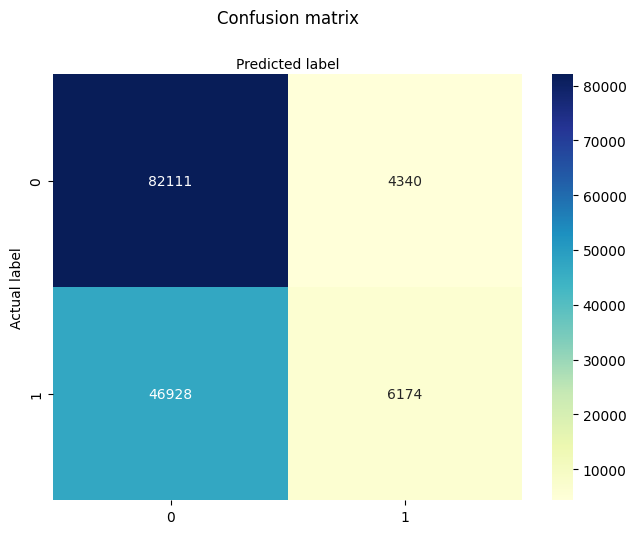

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

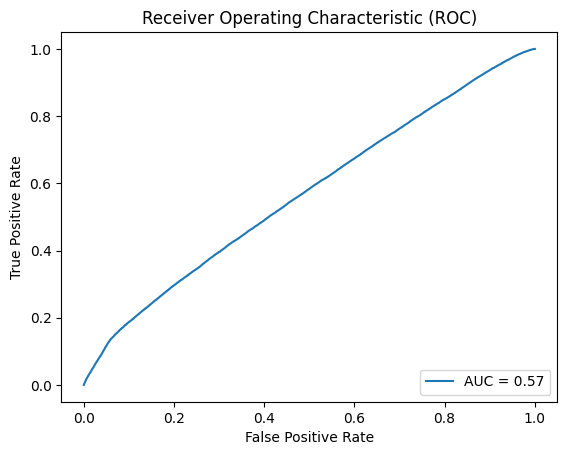

AUC Score: 0.5697678449333916


In [ ]:
y_pred_proba = xg.predict_proba(x_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label= 'AUC = %0.2f' % auc)
plt.legend(loc=4)
plt.title('Receiver Operating Characteristic (ROC)')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()
print('AUC Score:', auc)

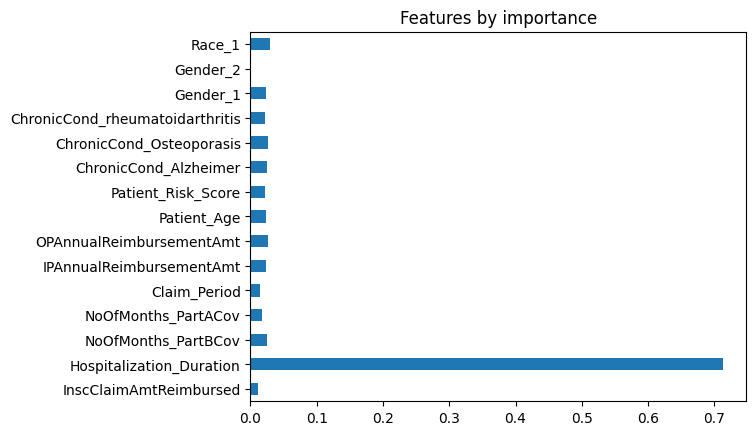

In [ ]:
feat_importances = pd.Series(xg.feature_importances_, index=df.iloc[:,:-1].columns)
feat_importances.plot(kind='barh')
plt.title("Features by importance")
plt.show()

In [ ]:
feat_importances

InscClaimAmtReimbursed             0.010702
Hospitalization_Duration           0.712800
NoOfMonths_PartBCov                0.024709
NoOfMonths_PartACov                0.017159
Claim_Period                       0.014117
IPAnnualReimbursementAmt           0.023698
OPAnnualReimbursementAmt           0.026328
Patient_Age                        0.022803
Patient_Risk_Score                 0.021425
ChronicCond_Alzheimer              0.024363
ChronicCond_Osteoporasis           0.026620
ChronicCond_rheumatoidarthritis    0.021736
Gender_1                           0.023393
Gender_2                           0.000000
Race_1                             0.030148
dtype: float32

In [ ]:
clf = xgb.XGBClassifier(learning_rate = 0.05, n_estimators=300, max_depth=5)


In [ ]:
#function inputs X:features.Y: Target, classifer: sklearn classifier, K:folds in cross validation, scoring: evaluation metric(f1)
def my_eval(X, y, classifer = clf, k=10, scoring = 'f1'):
    scores = []
    for i in range(5):
        #### generate random numbers to shuffle the data for training and test
        np.random.seed(2021)
        random_int = np.random.randint(0,3000)
        #### create cross validation folds
        kfold = model_selection.KFold(n_splits=k, random_state=random_int, shuffle=True)
        #### record the score
        score = model_selection.cross_val_score(clf, X=X, y=y, cv=kfold, scoring=scoring)
        scores.append(score)
    scores = np.array(scores)
    #### we need to calculate the bias (average score) and viariance (std)
    bias, variance = round(scores.mean(),4), round(scores.std(),4)
    return(bias, variance)

In [ ]:

# Resampling and Balancing the data
sm = SMOTE(random_state = 2021)
X_res, Y_res = sm.fit_resample(x_train, y_train)

In [ ]:

#average f1_score from 10-fold CV
clf = xgb.XGBClassifier(learning_rate = 0.05, n_estimators=300, max_depth=5)
my_eval(X_res, Y_res, clf, 10)

(0.5676, 0.003)

In [ ]:
#average ROC_AUC from 10-fold CV
my_eval(X_res, Y_res, clf, 10, 'roc_auc')

(0.7054, 0.0023)

In [ ]:
grp = ['Provider','PotentialFraud','PredictedFraud']

In [ ]:
df_pred = df_pred[grp]

In [ ]:
df_ratio = df_pred.groupby(by=['Provider']).sum()

In [ ]:
df_ratio['Ratio'] = df_ratio['PredictedFraud'] / df_ratio['PotentialFraud']
df_ratio.sort_values(by=['Ratio'],ascending=False)

,PotentialFraud,PredictedFraud,Ratio
Provider,,,
PRV54720,2,1,0.500000
PRV55482,25,10,0.400000
PRV55626,5,2,0.400000
PRV55193,11,4,0.363636
PRV54342,11,4,0.363636
...,...,...,...
PRV57086,2,0,0.000000
PRV52241,5,0,0.000000
PRV52606,12,0,0.000000


In [ ]:
df_ratio.describe().T

,count,mean,std,min,25%,50%,75%,max
PotentialFraud,294.0,180.619048,303.332117,0.0,26.00000,70.000000,203.000000,3194.0
PredictedFraud,294.0,35.761905,59.890951,0.0,4.25000,14.500000,42.750000,608.0
Ratio,293.0,0.191974,0.068392,0.0,0.16129,0.197302,0.222222,0.5


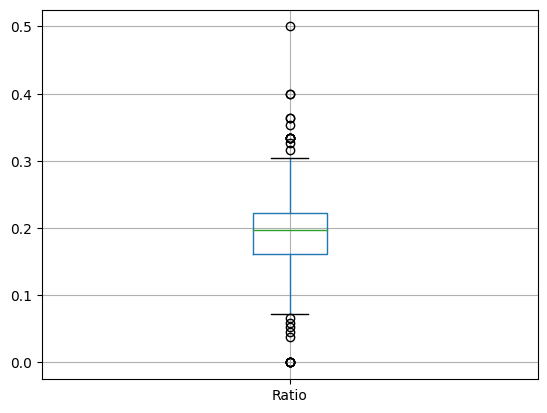

In [ ]:
df_ratio.boxplot(column=['Ratio'], return_type='axes');


In [ ]:
df_ratio['Ratio'].quantile([0.25, 0.7, 0.9])

0.25    0.161290
0.70    0.216394
0.90    0.260870
Name: Ratio, dtype: float64